In [1]:
# Import Basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10

In [3]:
# Load CIFAR 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
# Feature scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

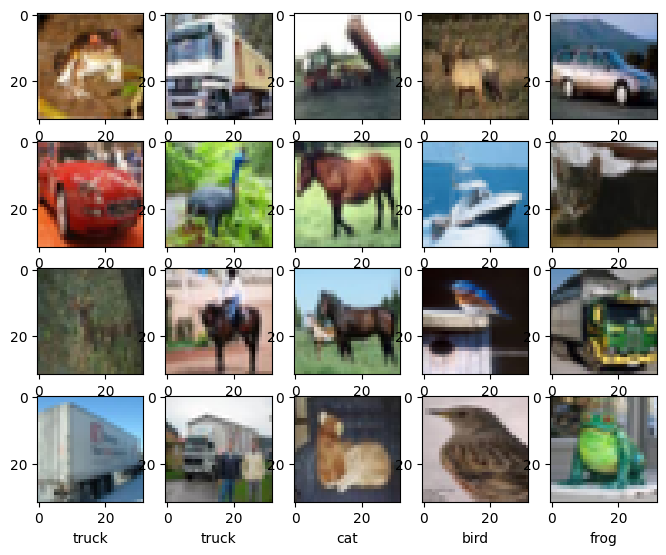

In [11]:
plt.figure(figsize=(8,8))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(class_name[y_train[i][0]])

plt.show()

In [16]:
# CNN Model building

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# DNN approch
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Model analysis
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)        

In [17]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=31, epochs = 20)

Epoch 1/20
1613/1613 [==============================] - 21s 6ms/step - loss: 1.6101 - accuracy: 0.4094 - val_loss: 1.3726 - val_accuracy: 0.4951
Epoch 2/20
1613/1613 [==============================] - 10s 6ms/step - loss: 1.2868 - accuracy: 0.5395 - val_loss: 1.2255 - val_accuracy: 0.5609
Epoch 3/20
1613/1613 [==============================] - 8s 5ms/step - loss: 1.1653 - accuracy: 0.5893 - val_loss: 1.1291 - val_accuracy: 0.6009
Epoch 4/20
1613/1613 [==============================] - 9s 5ms/step - loss: 1.0850 - accuracy: 0.6174 - val_loss: 1.0994 - val_accuracy: 0.6096
Epoch 5/20
1613/1613 [==============================] - 8s 5ms/step - loss: 1.0286 - accuracy: 0.6358 - val_loss: 1.1005 - val_accuracy: 0.6078
Epoch 6/20
1613/1613 [==============================] - 8s 5ms/step - loss: 0.9812 - accuracy: 0.6556 - val_loss: 1.0283 - val_accuracy: 0.6384
Epoch 7/20
1613/1613 [==============================] - 9s 6ms/step - loss: 0.9451 - accuracy: 0.6681 - val_loss: 1.0081 - val_accurac

In [ ]:
# Accuracy
# Epoch 20/20
# 1613/1613 [==============================] - 8s 5ms/step - loss: 0.6969 - accuracy: 0.7539 - val_loss: 0.9002 - val_accuracy: 0.6967
